In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


#### EDA

##### Univariate Analysis

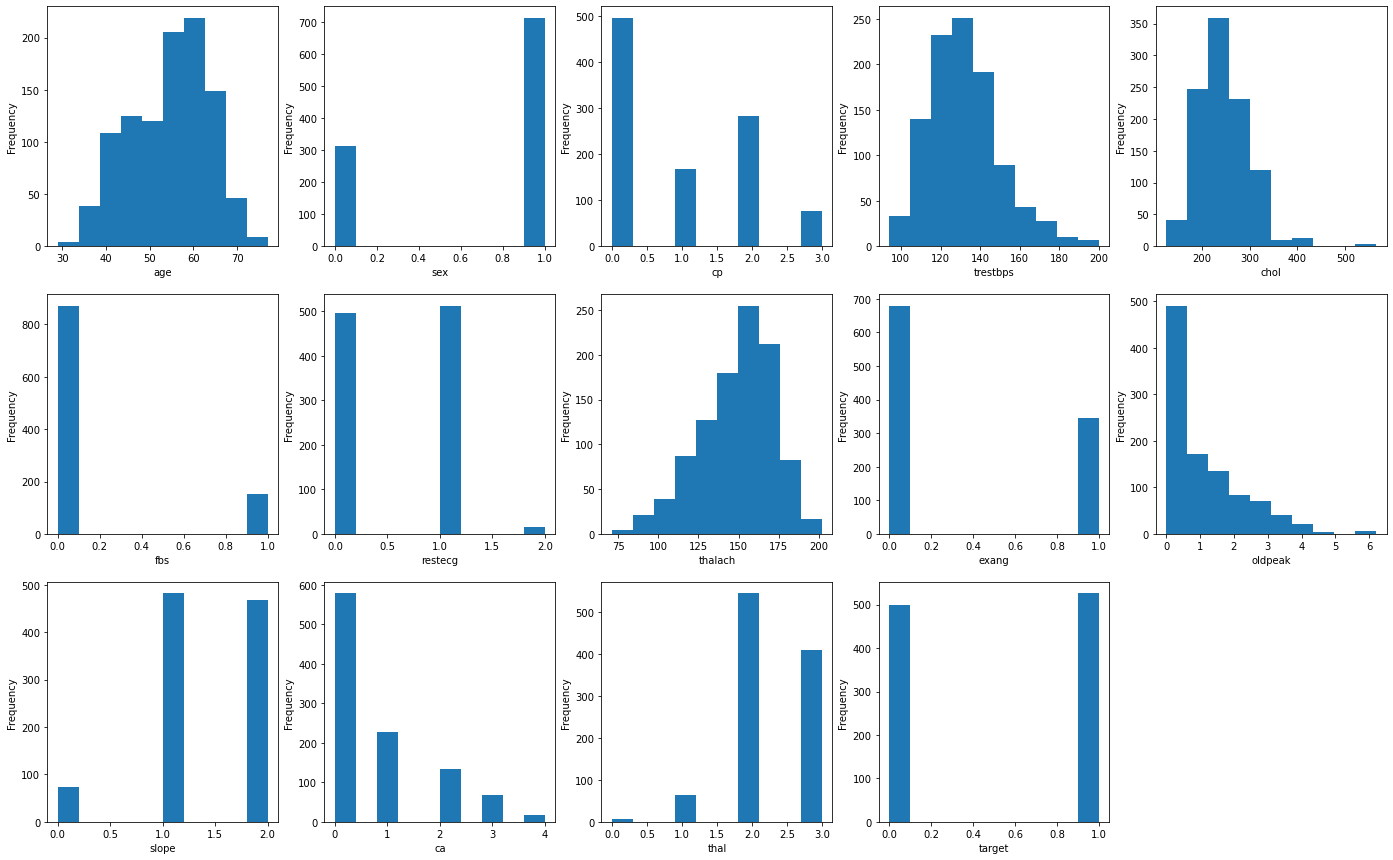

In [6]:
fig = plt.figure(figsize=(24,15))
i = 0
for column in data:
    sub = fig.add_subplot(3,5, i + 1)
    sub.set_xlabel(column)
    data[column].plot(kind='hist')
    i +=1

#### Categorical Feature vs Target

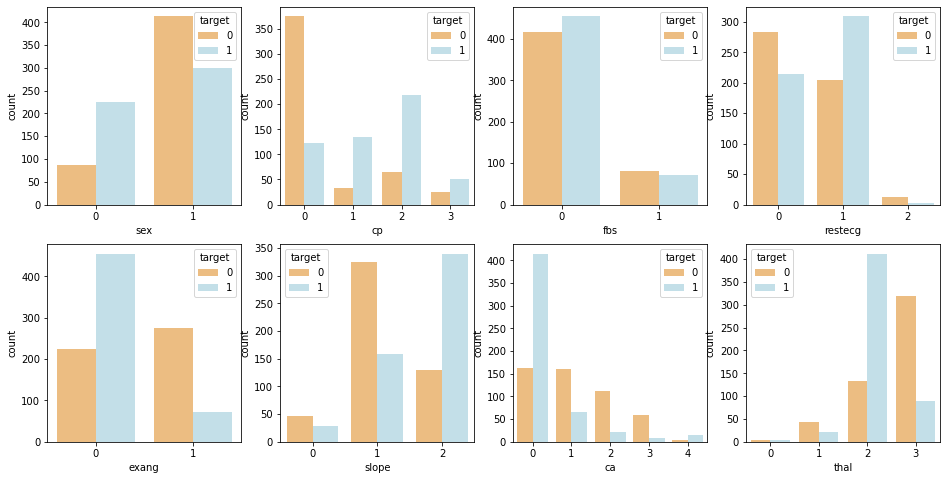

In [8]:
cat_features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','ca','thal']

fig = plt.figure(figsize=(16,8))
for i in range(len(cat_features)):
    column = cat_features[i]
    sub = fig.add_subplot(2,4, i + 1)
    chart = sns.countplot(data = data, x = column, hue='target', palette = 'RdYlBu')

##### Numerical Features Vs Target

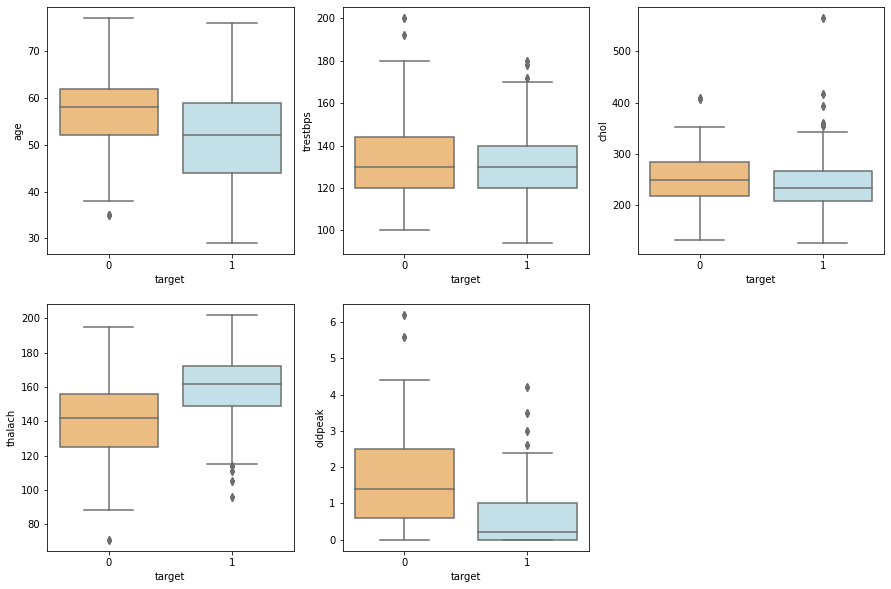

In [11]:
num_features = ['age', 'trestbps','chol','thalach','oldpeak']

fig = plt.figure(figsize=(15,10))

for i in range(len(num_features)):
    column = num_features[i]
    sub = fig.add_subplot(2,3,i+1)
    sns.boxplot(x = 'target', y = column, data = data, palette='RdYlBu')

### Split Dataset

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = data.drop(['target'], axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### ML Pipeline

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model_pipeline = []

model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

#### Model Evaluation

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
model_list = ['Logistic Regression', 'SCM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))

##### Confusion Matrix

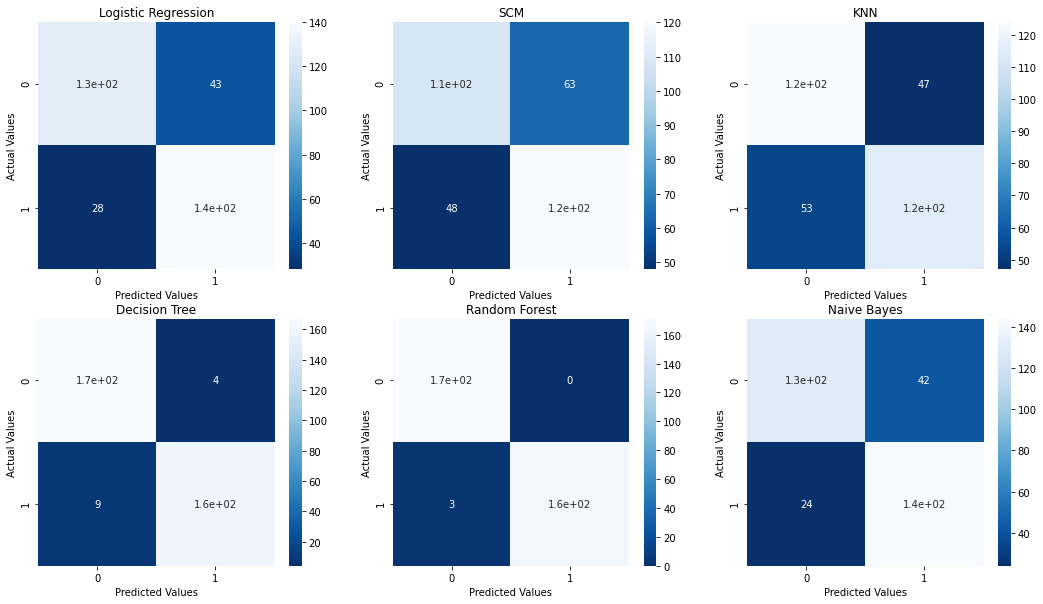

In [22]:
fig = plt.figure(figsize=(18,10))

for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot = True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [25]:
##### Accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df.sort_values(by = ['AUC'], ascending = False)

,Model,Accuracy,AUC
4,Random Forest,0.991150,0.99
3,Decision Tree,0.961652,0.96
5,Naive Bayes,0.805310,0.81
0,Logistic Regression,0.790560,0.79
2,KNN,0.705015,0.70
1,SCM,0.672566,0.67
